In [6]:
pip install geopandas


  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached pyogrio-0.10.0.tar.gz (281 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 5.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 43.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 51.0 MB/s eta 0:00:00
  Created wheel for pyogrio: filename=pyogrio-0.10.0-cp39-cp39-macosx_10_9_x86_64.whl size=609523 sha256=e2e56f40941aa1068965a46cba4a5ea09693e1e8354b5a95473ff615dc0d17b8
  Stored in directory: /Users/nazmulahasan/Library/Caches/pip/wheels/5f/de/47/2558c7443d25be6fa68ab408996bd7d360d9ffc5165f431981
Successfully built pyogrio

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip3.9 install --upgrade pip
Note: you may need to restart the kernel to use updated packa

Matplotlib is building the font cache; this may take a moment.


Index(['ctr_n', 'ctr', 'yr', 'cst_n', 'cst', 'geometry'], dtype='object')


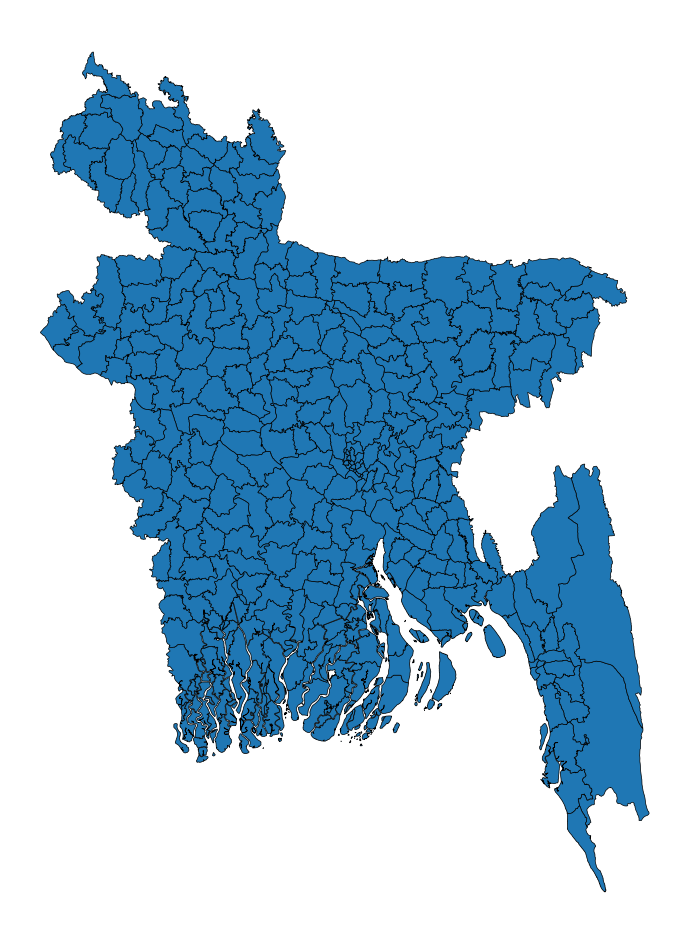

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load shapefile
gdf = gpd.read_file("bd_constituencies.shp")  # adjust filename if needed

# Preview column names
print(gdf.columns)

# Plot and export to SVG
fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, edgecolor='black', linewidth=0.5)

# Remove axes
ax.axis('off')

# Save to SVG
fig.savefig("bangladesh_constituencies.svg", format="svg")


In [7]:
import geopandas as gpd

gdf = gpd.read_file("bd_constituencies.shp")

# Print all column names
print(gdf.columns.tolist())


['ctr_n', 'ctr', 'yr', 'cst_n', 'cst', 'geometry']


In [13]:
import geopandas as gpd

gdf = gpd.read_file("bd_constituencies.shp")

# Generate lowercase-dashed IDs like "dhaka-8"
gdf["id"] = gdf["cst_n"].str.lower().str.replace(" ", "-", regex=False)

# Set 'id' as index to preserve in GeoJSON → SVG conversion
gdf = gdf.set_index("id")

# Export to GeoJSON for mapshaper
gdf.to_file("bd_constituencies.geojson", driver="GeoJSON")